# Import Modules and Data

In [3]:
from matplotlib.ticker import MaxNLocator
import re
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Single epoch mass estimate using single gaussian broad line models for the emission lines.
path_24 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2024_Analysis/'
conti_results_24 = pd.read_csv(path_24 + 'mcmc_conti_results.csv') # Continuum parameters
line_results_24 = pd.read_csv(path_24 + 'mcmc_line_results.csv') # Individual line parameters
fur_results_24 = pd.read_csv(path_24 + 'mcmc_fur_results.csv') # Combined line complex parameters

path_22 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2022_Analysis/'
conti_results_22 = pd.read_csv(path_22 + 'mcmc_conti_results.csv') # Continuum parameters
line_results_22 = pd.read_csv(path_22 + 'mcmc_line_results.csv') # Individual line parameters
fur_results_22 = pd.read_csv(path_22 + 'mcmc_fur_results.csv') # Combined line complex parameters

path_04 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2009_Analysis/'
conti_results_04 = pd.read_csv(path_04 + 'mcmc_conti_results.csv')
line_results_04 = pd.read_csv(path_04 + 'mcmc_line_results.csv')
fur_results_04 = pd.read_csv(path_04 + 'mcmc_fur_results.csv')

# AGN Classification

Following Winkler (1992) convention

Type 1.0: 5 <= R

Type 1.2: 2 <= R < 5

Type 1.5: 0.333 <= R < 2

Type 1.8: R < 0.333

Type 1.9: no HB BEL, only HA

Type 2.0: no HB or HA BEL

In [40]:
# Broad HB Flux
HB_04 = fur_results_04['area'][5]
HB_04_err = fur_results_04['area_err'][5]
HB_22 = fur_results_22['area'][5]
HB_22_err = fur_results_22['area_err'][5]
HB_24 = fur_results_24['area'][5]
HB_24_err = fur_results_24['area_err'][5]

# Narrow OIII5007 Flux
OIII_04 = line_results_04['Area'][12]
OIII_22 = line_results_22['Area'][12]
OIII_24 = line_results_24['Area'][12]

# Calculate the R value flux ration between BEL and NEL flux
R_04 = HB_04/OIII_04
R_22 = HB_22/OIII_22
R_24 = HB_24/OIII_24

print('2004 R = ' + str(R_04) + ' Type 1.5')
print('2022 R = ' + str(R_22) + ' Type 1.5')
print('2024 R = ' + str(R_24) + '  Type 1.2')

2004 R = 1.0804860002112198 Type 1.5
2022 R = 1.6990415279348723 Type 1.5
2024 R = 2.042924378954868  Type 1.2


In [48]:
fur_results_04

,Unnamed: 0,br_line,fwhm,fwhm_err,sigma,sigma_err,ew,ew_err,peak,peak_err,area,area_err,snr,snr_err
0,0,OII,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,NeIII,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,Hep,1414.499439,0.580668,599.950325,0.207932,1.260087,0.693662,3972.008344,0.308661,45.312666,24.944072,0.308372,0.170832
3,3,Hd,2584.130162,449.964445,1198.343611,266.947889,10.538362,1.274564,4075.812205,0.507191,386.235877,46.682935,1.679962,0.215800
4,4,Hg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,Hb,8359.124383,503.081943,5001.377675,245.310104,102.770871,3.831480,4868.006316,1.553854,4094.018319,152.532089,5.584025,0.278451
6,6,HeI,1280.931502,4303.632110,536.600170,711.682813,7.933464,7.451220,5870.997623,0.533494,289.047065,269.422250,3.232491,0.420434
7,7,OI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8,Ha,5319.237306,216.023091,2050.578134,40.711916,142.685463,4.241672,6552.118492,2.163022,4057.755243,120.237426,11.141366,0.467501


# Evolution of FWHM

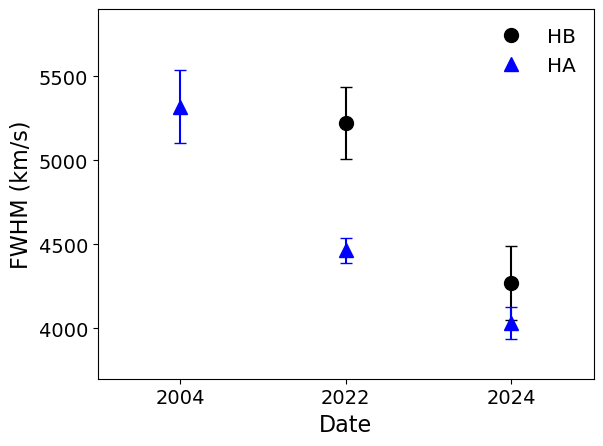

In [50]:
# Create list of FWHM values for HB and HA over the 3 epochs
HB_fwhm = [fur_results_04['fwhm'][5], fur_results_22['fwhm'][5], fur_results_24['fwhm'][5]]
HB_fwhm_err = [fur_results_04['fwhm_err'][5], fur_results_22['fwhm_err'][5], fur_results_24['fwhm_err'][5]]

HA_fwhm = [fur_results_04['fwhm'][8], fur_results_22['fwhm'][8], fur_results_24['fwhm'][8]]
HA_fwhm_err = [fur_results_04['fwhm_err'][8], fur_results_22['fwhm_err'][8], fur_results_24['fwhm_err'][8]]


plt.plot([0,1,2], HB_fwhm, marker='o', linestyle='none', label='HB', color='black', markersize=10)
plt.errorbar([0,1,2], HB_fwhm, yerr=HB_fwhm_err, linestyle='none', color='black', capsize=4)

plt.plot([0,1,2], HA_fwhm, marker='^', linestyle='none', label='HA', color='blue', markersize=10)
plt.errorbar([0,1,2], HA_fwhm, yerr=HA_fwhm_err, linestyle='none', color='blue', capsize=4)

plt.xlim([-0.5, 2.5])
plt.ylim([3700, 5900])

plt.ylabel('FWHM (km/s)', fontsize=16)
plt.xlabel('Date', fontsize=16)

plt.xticks([0,1,2], ['2004', '2022', '2024'], fontsize=14)
plt.yticks([4000, 4500, 5000, 5500], fontsize=14)

plt.legend(frameon=False, fontsize='x-large')
plt.show()

# Balmer Decrement

Ha/Hb, for broad emission average is 3.06

In [51]:
fur_results_22

,Unnamed: 0,line_comp,fwhm,fwhm_err,sigma,sigma_err,ew,ew_err,peak,peak_err,area,area_err,snr,snr_err
0,0,OII,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,NeIII,0.000000,887.738671,0.000000,371.908513,0.000000,4.008712,0.000000,1934.494885,0.000000,554.283645,0.000000,2.936129
2,2,Hep,2416.502319,459.158337,1126.802446,183.128454,8.583512,1.202256,3962.966013,0.534958,973.301677,135.456390,2.882370,0.365789
3,3,Hd,4039.460104,454.181922,1720.532417,148.170020,19.820807,1.614484,4092.208848,1.360837,1747.838172,142.237476,4.289788,0.337327
4,4,Hg,4904.903561,264.443594,2055.077817,110.857666,61.436033,2.812197,4340.157250,1.198793,3579.792508,164.002994,7.620206,0.401230
5,5,Hb,5221.565867,215.590725,5991.697847,146.400700,232.409689,7.718373,4856.053239,1.043339,7976.799415,267.660284,26.441195,1.719871
6,6,HeI,1875.829133,123.962615,4456.198613,526.236488,84.390079,5.918651,5875.972686,0.456037,2250.712850,157.949023,9.235400,0.698569
7,7,OI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8,Ha,4464.801458,75.795924,1870.430230,31.875790,538.345702,11.546728,6558.045408,0.708526,15406.902855,330.012656,54.169774,2.540058


In [46]:
# IMPORTANT NOST BALMER DECREMENTS ARE FOR NLR... I NEED TO FIND SPECIFIC BLR STUFF SO THESE RATIOS WILL NOT MATCH OTHER PAPERS.
Ha_04 = fur_results_04['area'][8]
Ha_04_err = fur_results_04['area_err'][8]
Ha_22 = fur_results_22['area'][8]
Ha_22_err = fur_results_22['area_err'][8]
Ha_24 = fur_results_24['area'][8]
Ha_24_err = fur_results_24['area_err'][8]

Hg_04 = fur_results_04['area'][4]
Hg_04_err = fur_results_04['area_err'][4]
Hg_22 = fur_results_22['area'][4]
Hg_22_err = fur_results_22['area_err'][4]
Hg_24 = fur_results_24['area'][4]
Hg_24_err = fur_results_24['area_err'][4]

Hd_04 = fur_results_04['area'][3]
Hd_04_err = fur_results_04['area_err'][3]
Hd_22 = fur_results_22['area'][3]
Hd_22_err = fur_results_22['area_err'][3]
Hd_24 = fur_results_24['area'][3]
Hd_24_err = fur_results_24['area_err'][3]

# Create dataframe of broad line ratios relative to Hbeta
balmer_ratios = pd.DataFrame(columns=['2004','2022','2024'], index=['Ha','Hb','Hg','Hd'])

balmer_ratios.loc['Ha'] = pd.Series({'2004':Ha_04/HB_04, '2022':Ha_22/HB_22, '2024':Ha_24/HB_24})
balmer_ratios.loc['Hb'] = pd.Series({'2004':HB_04/HB_04, '2022':HB_22/HB_22, '2024':HB_24/HB_24})
balmer_ratios.loc['Hg'] = pd.Series({'2004':Hg_04/HB_04, '2022':Hg_22/HB_22, '2024':Hg_24/HB_24})
balmer_ratios.loc['Hd'] = pd.Series({'2004':Hd_04/HB_04, '2022':Hd_22/HB_22, '2024':Hd_24/HB_24})

balmer_ratios

,2004,2022,2024
Ha,0.991142,1.931464,1.836472
Hb,1.0,1.0,1.0
Hg,0.0,0.448776,0.398663
Hd,0.094342,0.219115,0.25007
